In [11]:
import pandas as pd

l2s = []
with open('../attribute_extraction_metadata_template/2023_q1_top_25_l2s.txt', 'r') as f:
    for l in f:
        if len(l.replace('\n', '').strip()) > 0:
            l2s.append(l.replace('\n', '').strip())

df_meta_25 = pd.read_csv('../attribute_extraction_metadata_template/attribute_definition_top25L2_filtered_augmented_01162023.csv')

df_tax = pd.read_json('../taxonomy/wish_newtax.json', lines=True)
df_tax = df_tax[df_tax.category_path.apply(len) > 0]

id2l1 = {}
id2l2 = {}
id2l3 = {}
id2l4 = {}
id2l5 = {}
id2path = {}

for i in df_tax.to_dict('records'):
    id2l1[int(i['id'])] = ' > '.join(i['category_path'].split(' > ')[:1])
    id2l2[int(i['id'])] = ' > '.join(i['category_path'].split(' > ')[:2])
    id2l3[int(i['id'])] = ' > '.join(i['category_path'].split(' > ')[:3])
    id2l4[int(i['id'])] = ' > '.join(i['category_path'].split(' > ')[:4])
    id2l5[int(i['id'])] = ' > '.join(i['category_path'].split(' > ')[:5])
    id2path[int(i['id'])] = i['category_path']

df_offshore_test = pd.read_json('../query_label/processed/Offshore_Labelled_Query_Classification_Test.json', lines=True)
df_offshore_val = pd.read_json('../query_label/processed/Offshore_Labelled_Query_Classification_Val.json', lines=True)
df_offshore_train = pd.read_json('../query_label/processed/Offshore_Labelled_Query_Classification_Train_01112023.json', lines=True)
df_appen_train = pd.read_json('../query_label/processed/Appen_Labelled_Query_Classification_Train_NoOverlapOffshore_01112023.json', lines=True)

df_offshore_test['split'] = 'test'
df_offshore_val['split'] = 'val'
df_offshore_train['split'] = 'train'
df_appen_train['split'] = 'train'

df_all = pd.concat([df_offshore_test, df_offshore_val, df_offshore_train, df_appen_train])

df_all_long = df_all[df_all['query'].apply(lambda x: x.count(" ") >= 2)]

df_all_long_withclf = df_all_long[df_all_long.query_classification_ids.apply(lambda x: x[0] != -1)]

df_all_long_withclf['top_query_classification_id'] = df_all_long_withclf['query_classification_ids'].apply(lambda x: x[0])

df_all_long_withclf['top_query_classification_taxonomy'] = df_all_long_withclf['top_query_classification_id'].apply(lambda x: id2path[x])

/tmp/ipykernel_6735/3486947384.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_long_withclf['top_query_classification_id'] = df_all_long_withclf['query_classification_ids'].apply(lambda x: x[0])
/tmp/ipykernel_6735/3486947384.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_long_withclf['top_query_classification_taxonomy'] = df_all_long_withclf['top_query_classification_id'].apply(lambda x: id2path[x])


In [25]:
df_batch0 = pd.read_csv('allstratified_sample_4806_query.csv')

In [15]:
l2_25_tuple_set = set(df_meta_25['category'].apply(lambda x: tuple(x.split(' > '))))

In [16]:
for i in l2_25_tuple_set:
    assert ' > '.join(i[:2]) in l2s

In [17]:
len(set([' > '.join(i[:2]) for i in l2_25_tuple_set]))

25

In [19]:
def filter_tax(x):
    x_tup = tuple(x.split(' > '))
    for i in l2_25_tuple_set:
        min_len = min(len(x_tup), len(i))
        if x_tup[:min_len] == i[:min_len]:
            return True
    return False

In [23]:
df_all_long_withclf_filtered = df_all_long_withclf[df_all_long_withclf.top_query_classification_taxonomy.apply(filter_tax)]

In [27]:
queries_batch0 = set(df_batch0['query'])
assert len(queries_batch0) == len(queries_batch0)
df_all_long_withclf_filtered_dedup = df_all_long_withclf_filtered[df_all_long_withclf_filtered['query'].apply(lambda x: x not in queries_batch0)]

<AxesSubplot: ylabel='sample_method'>

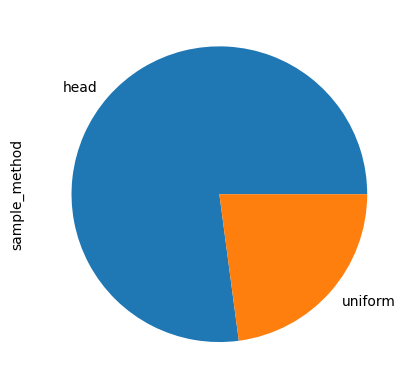

In [29]:
df_all_long_withclf_filtered_dedup.sample_method.value_counts().plot.pie()

<AxesSubplot: ylabel='top_query_classification_taxonomy'>

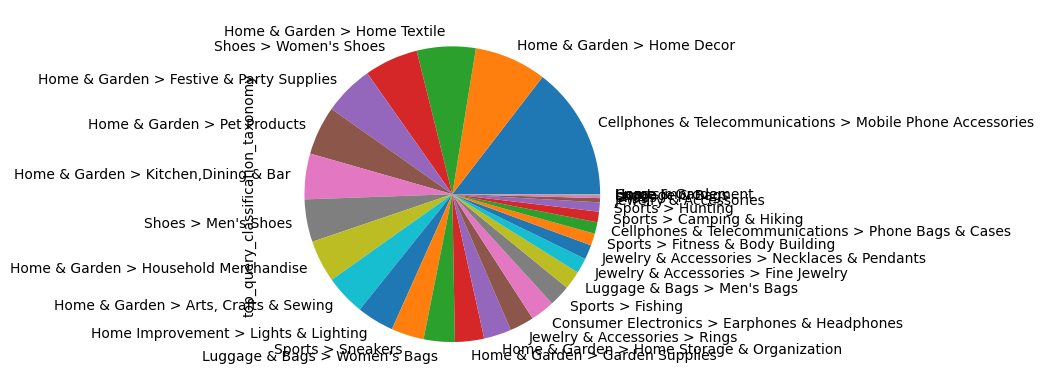

In [32]:
df_all_long_withclf_filtered_dedup.top_query_classification_taxonomy.apply(lambda x: ' > '.join(x.split(' > ')[:2])).value_counts().plot.pie()

<AxesSubplot: ylabel='split'>

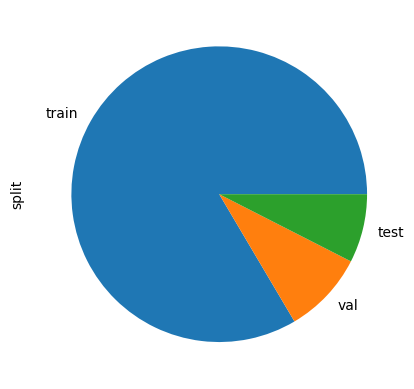

In [34]:
df_all_long_withclf_filtered_dedup.split.value_counts().plot.pie()

In [36]:
df_batch0

,label_ordering,query,sample_method,top_query_classification_taxonomy
0,2308,hyundai elantra accessories,head,Automobiles & Motorcycles > Car Electronics > ...
1,2310,peine para perros,head,Home & Garden > Pet Products > Dog Grooming > ...
2,2316,mens boots clearance,head,Shoes > Men's Shoes > Men's Boots > Basic Boots
3,2318,garbage pail kids,head,Toys & Hobbies > Puzzles & Games > Games > Car...
4,2320,luces de piscina,uniform,Home Improvement > Lights & Lighting > Outdoor...
...,...,...,...,...
4801,99925,spray gun paint,head,Home Improvement > Painting Supplies & Wall Tr...
4802,99947,kurta set for women,head,Novelty & Special Use > Traditional & Cultural...
4803,99964,strap on harnesses,head,Mother & Kids > Activity & Gear > Harnesses & ...
4804,99972,coleira para gato,head,Home & Garden > Pet Products > Cat Supplies > ...


In [38]:
df_all_long_withclf_filtered_dedup[['label_ordering', 'query', 'sample_method', 'top_query_classification_taxonomy']].to_json(
    'appen/input_batch/query_human_labelled_leftover_01202023.json', lines=True, orient='records')